# Dataset Download

We'll use the Kaggle's dataset Brain tumor multimodal image (CT & MRI)

https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

In [ ]:
! curl -L -o raw_data/brain-tumor-multimodal-image-ct-and-mri.zip\
  https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

In [1]:
! ls -l raw_data/brain*

-rw-r--r-- 1 maxkaizo maxkaizo 378311120 Jan  1 21:16 raw_data/brain-tumor-multimodal-image-ct-and-mri.zip


In [6]:
! unzip raw_data/brain-tumor-multimodal-image-ct-and-mri.zip -d raw_data/

Archive:  raw_data/brain-tumor-multimodal-image-ct-and-mri.zip
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/CT image source.txt  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1).png  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (10).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (10).png  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (100).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (100).png  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1000).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1001).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1002).jpg  
  inflating: raw_data/Dataset/Brain Tumor CT scan Images/Healthy/ct_h

# Data Preparation

Lets get to know our dataset, first of all, lets see how many files, do we have an what is the folder structure

In [8]:
! tree -L 3 raw_data/Dataset

raw_data/Dataset
├── Brain Tumor CT scan Images
│   ├── CT image source.txt
│   ├── Healthy
│   │   ├── ct_healthy (1).jpg
│   │   ├── ct_healthy (1).png
│   │   ├── ct_healthy (10).jpg
│   │   ├── ct_healthy (10).png
│   │   ├── ct_healthy (100).jpg
│   │   ├── ct_healthy (100).png
│   │   ├── ct_healthy (1000).jpg
│   │   ├── ct_healthy (1001).jpg
│   │   ├── ct_healthy (1002).jpg
│   │   ├── ct_healthy (1003).jpg
│   │   ├── ct_healthy (1004).jpg
│   │   ├── ct_healthy (1005).jpg
│   │   ├── ct_healthy (1006).jpg
│   │   ├── ct_healthy (1007).jpg
│   │   ├── ct_healthy (1008).jpg
│   │   ├── ct_healthy (1009).jpg
│   │   ├── ct_healthy (101).jpg
│   │   ├── ct_healthy (101).png
│   │   ├── ct_healthy (1010).jpg
│   │   ├── ct_healthy (1011).jpg
│   │   ├── ct_healthy (1012).jpg
│   │   ├── ct_healthy (1013).jpg
│   │   ├── ct_healthy (1014).jpg
│   │   ├── ct_healthy (1015).jpg
│   │   ├── ct_healthy (1016).jpg
│   │   ├── ct_healthy (1017).jpg
│   │   ├── ct_healthy (1018).jpg
│   

The output is too long as we have 9260 files, so i'll create a inventory file including all file names and location, and then I'll make a summary of the distribution. (I'll only post here the resulting summary, to avoid unproductive logs)

In [9]:
! ! tree -L 4 raw_data/Dataset -o inventory.txt

At this point we have all the images in our environment, here's the file distribution

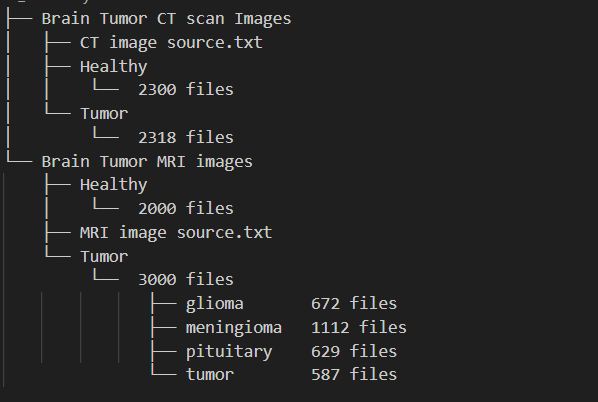

I have a decision to make here, I could identify the presence of a tumor for each method, adding up to 4 classes (CT healthy/tumor + MRI healthy/tumor), but for learning purposes I'll use also the tumor types available at MRI.

This may create an imbalance problem, but lets see the results.

So, I'll proceed with the split

In [10]:
! tree -fL 2 Dataset/

Dataset
├── Dataset/test
│   ├── Dataset/test/ct_healthy
│   ├── Dataset/test/ct_tumor
│   ├── Dataset/test/mri_glioma
│   ├── Dataset/test/mri_healthy
│   ├── Dataset/test/mri_meningioma
│   ├── Dataset/test/mri_pituitary
│   └── Dataset/test/mri_tumor
├── Dataset/train
│   ├── Dataset/train/ct_healthy
│   ├── Dataset/train/ct_tumor
│   ├── Dataset/train/mri_glioma
│   ├── Dataset/train/mri_healthy
│   ├── Dataset/train/mri_meningioma
│   ├── Dataset/train/mri_pituitary
│   └── Dataset/train/mri_tumor
└── Dataset/val
    ├── Dataset/val/ct_healthy
    ├── Dataset/val/ct_tumor
    ├── Dataset/val/mri_glioma
    ├── Dataset/val/mri_healthy
    ├── Dataset/val/mri_meningioma
    ├── Dataset/val/mri_pituitary
    └── Dataset/val/mri_tumor

25 directories, 0 files


In [11]:
!find Dataset -type d -exec sh -c 'echo "{}: $(find "{}" -type f | wc -l) files"' \;

Dataset: 9618 files
Dataset/test: 1445 files
Dataset/test/ct_tumor: 348 files
Dataset/test/mri_glioma: 101 files
Dataset/test/ct_healthy: 345 files
Dataset/test/mri_pituitary: 95 files
Dataset/test/mri_healthy: 300 files
Dataset/test/mri_meningioma: 167 files
Dataset/test/mri_tumor: 89 files
Dataset/val: 1443 files
Dataset/val/ct_tumor: 348 files
Dataset/val/mri_glioma: 101 files
Dataset/val/ct_healthy: 345 files
Dataset/val/mri_pituitary: 94 files
Dataset/val/mri_healthy: 300 files
Dataset/val/mri_meningioma: 167 files
Dataset/val/mri_tumor: 88 files
Dataset/train: 6730 files
Dataset/train/ct_tumor: 1622 files
Dataset/train/mri_glioma: 470 files
Dataset/train/ct_healthy: 1610 files
Dataset/train/mri_pituitary: 440 files
Dataset/train/mri_healthy: 1400 files
Dataset/train/mri_meningioma: 778 files
Dataset/train/mri_tumor: 410 files


# EDA - Exploratory Data Analysis

## Explore images

We will explore the dataset in greater detail to better understand it and try to identify general or structural patterns inherent to the data, enabling us to make better decisions in the model design process. We'll begin showing some random examples

Folder: Dataset/train/ct_tumor


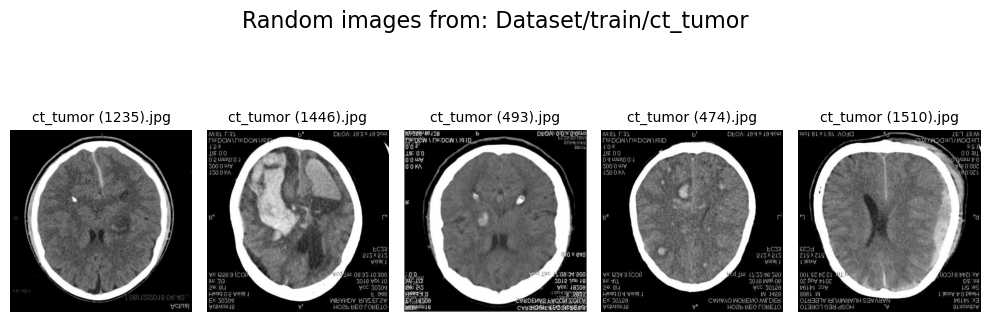

Folder: Dataset/train/mri_glioma


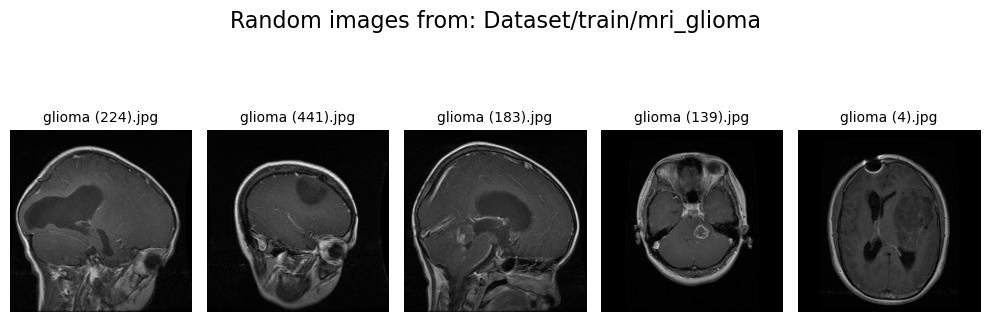

Folder: Dataset/train/ct_healthy


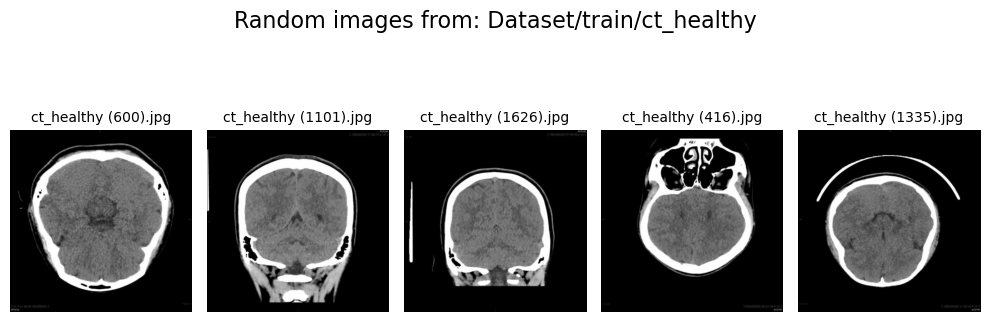

Folder: Dataset/train/mri_pituitary


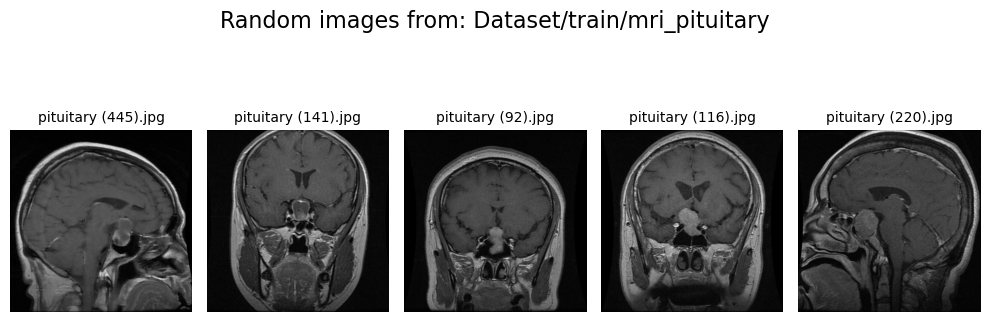

Folder: Dataset/train/mri_healthy


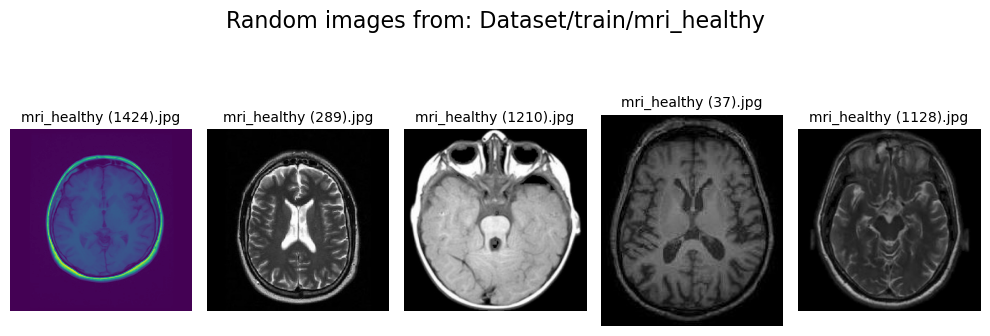

Folder: Dataset/train/mri_meningioma


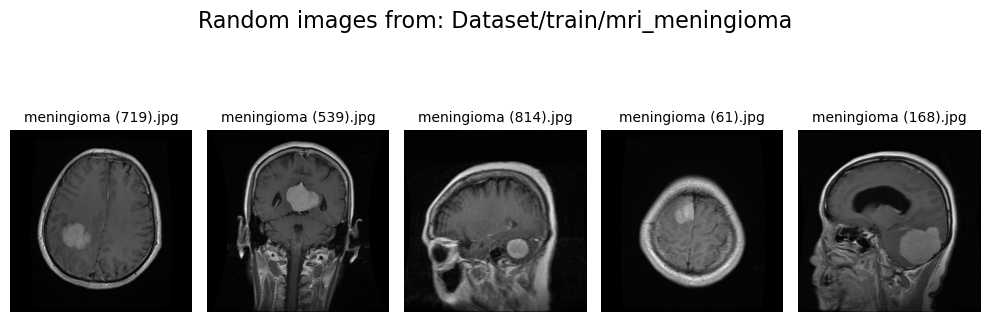

Folder: Dataset/train/mri_tumor


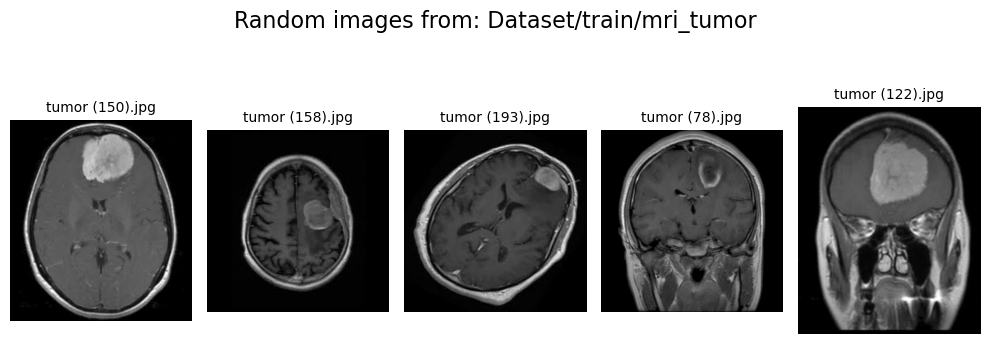

In [15]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Root directory of the dataset
root_dir = "Dataset/train"

# Number of random files to select per folder
num_samples = 5

# Dimensions to resize the images
resize_to = (250, 250)

# Traverse all folders
for root, dirs, files in os.walk(root_dir):
    if files:  # If the folder contains files
        full_paths = [os.path.join(root, f) for f in files]
        random_files = random.sample(full_paths, min(num_samples, len(full_paths)))
        print(f"Folder: {root}")
        
        # Create a plot with subplots
        fig, axes = plt.subplots(1, len(random_files), figsize=(10, 4))
        
        for ax, file in zip(axes, random_files):
            try:
                img = Image.open(file)
                # img = img.resize(resize_to)  # Resize the image
                ax.imshow(img)  # cmap="gray" is optional for grayscale images
                ax.set_title(os.path.basename(file), fontsize=10)
                ax.axis("off")  # Remove axes
            except Exception as e:
                print(f"Could not load image {file}: {e}")
        
        plt.suptitle(f"Random images from: {root}", fontsize=16)
        plt.tight_layout()
        plt.show()


There are some colored images, so let's examine their characteristics in detail, specifically the image mode of each file.

In [16]:
import os
from PIL import Image
from collections import defaultdict

# Main directory to traverse
directory = "Dataset"

# Use os.walk to traverse the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    print(f"Current directory: {root}")
    
    # Dictionary to count image modes
    mode_count = defaultdict(int)
    
    # Count the modes of the images
    for file in files:
        full_path = os.path.join(root, file)
        try:
            with Image.open(full_path) as img:
                mode_count[img.mode] += 1  # Increment the counter for the mode
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    # Display the results for the current folder
    for mode, count in mode_count.items():
        print(f"Mode: {mode} | Count: {count}")
    
    print("-" * 40)


Current directory: Dataset
----------------------------------------
Current directory: Dataset/test
----------------------------------------
Current directory: Dataset/test/ct_tumor
Mode: RGB | Count: 338
Mode: L | Count: 10
----------------------------------------
Current directory: Dataset/test/mri_glioma
Mode: RGB | Count: 101
----------------------------------------
Current directory: Dataset/test/ct_healthy
Mode: L | Count: 59
Mode: RGB | Count: 285
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_pituitary
Mode: RGB | Count: 95
----------------------------------------
Current directory: Dataset/test/mri_healthy
Mode: L | Count: 37
Mode: RGB | Count: 262
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_meningioma
Mode: RGB | Count: 167
----------------------------------------
Current directory: Dataset/test/mri_tumor
Mode: RGB | Count: 79
Mode: L | Count: 10
------------------------

It also seems that some images have already been partialy augmented, as some of the images are rotated, as shown in this example:

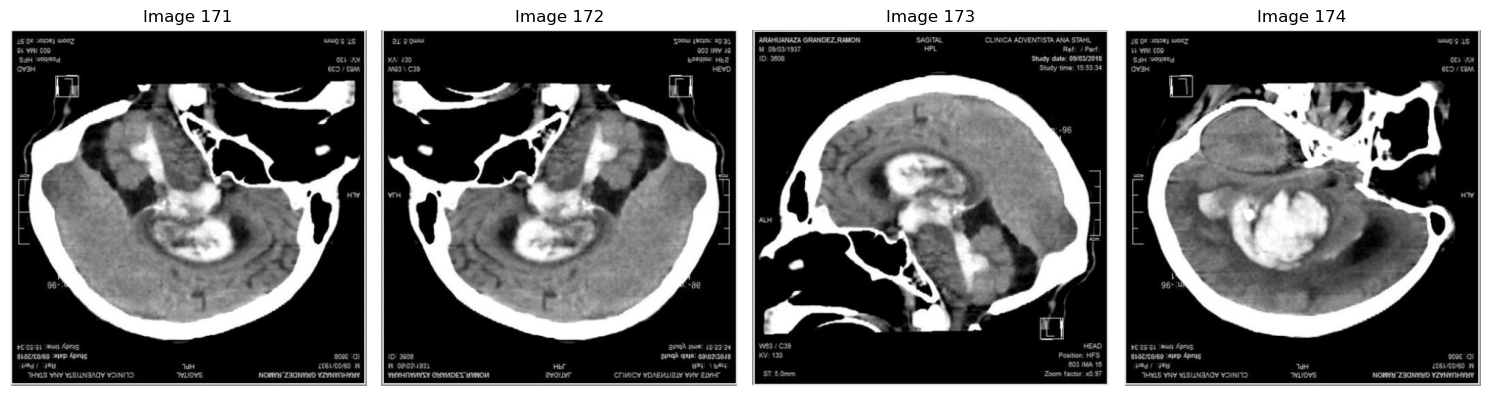

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the range of image numbers
start = 171
end = 174

# Directory and file pattern
directory = 'Dataset/train/ct_tumor/'
file_pattern = 'ct_tumor ({}).jpg'

# Load the images
images = [Image.open(f"{directory}{file_pattern.format(i)}") for i in range(start, end + 1)]

# Create a figure and axes for side-by-side display
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))  # 1 row, 7 columns

# Loop through the images and display them
for ax, img, num in zip(axes, images, range(start, end + 1)):
    ax.imshow(img)
    ax.axis('off')  # Hide axes for cleaner look
    ax.set_title(f"Image {num}")

# Show the plot
plt.tight_layout()
plt.show()


## EDA Findings

Starting from the most evident characteristics and delving deeper, we can conclude that the dataset includes:

- CT scan and MRI samples from both healthy patients and those with tumors.
- Samples from different sources, resulting in variations such as:
    - The inclusion of patient data within the image.
    - Different cuts and perspectives (frontal, top, lateral, etc.).
    - Images in different modes, specifically some in "L" mode (grayscale) and most in "RGB" mode (colored).
    - Images of varying sizes.
- Data augmentation has already been **partialy** applied, as there are cases where an image has been rotated and included in the dataset.

## EDA Conclusions and action Plan

Taking into account the previous findings and the number of images available in the dataset, we will leverage the transfer learning technique by using the Xception model from TensorFlow-Keras applications as a base, benefiting from its training on millions of images.

It is important to note that to use this model, we must adjust the input images to meet the specifications used during the training of the base model.

Action Plan:

1. Normalize Function:
    - Convert images to RGB if they are in grayscale (L) or RGBA.

2. Preprocessing:
    - Normalize the images to RGB and apply preprocess_input for compatibility with Xception.

3. ImageDataGenerator:
    - Use the preprocessing_function to seamlessly integrate normalization and preprocessing.

4. Load Data:
    - Load images from the designated folders.

In [18]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2025-01-04 22:20:09.389330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736050809.499308   12831 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736050809.528565   12831 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 22:20:09.786168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Function to normalize images to RGB format
def normalize_image(image):
    if tf.shape(image)[-1] == 1:  # Grayscale mode (L)
        image = tf.image.grayscale_to_rgb(image)
    elif tf.shape(image)[-1] == 4:  # RGBA mode
        image = image[..., :3]  # Remove the alpha channel
    return image

# Combined function to normalize and preprocess
def custom_preprocessing(image):
    image = normalize_image(image)  # Ensure RGB format
    return preprocess_input(image)  # Preprocess for Xception

# Configure ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=custom_preprocessing)

In [20]:
# Load data

# Train
train_generator = datagen.flow_from_directory(
    'Dataset/train/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

# test
test_generator = datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

# Validation
val_generator = datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

Found 6730 images belonging to 7 classes.
Found 1445 images belonging to 7 classes.
Found 1445 images belonging to 7 classes.


In [21]:
train_generator.class_indices

{'ct_healthy': 0,
 'ct_tumor': 1,
 'mri_glioma': 2,
 'mri_healthy': 3,
 'mri_meningioma': 4,
 'mri_pituitary': 5,
 'mri_tumor': 6}

# Base model Prediction

Let's make a prediction with the base model as it is, just to see the results

First we need to load a single image and preprocess it as the required format expected by Xception model

In [22]:
from tensorflow.keras.preprocessing.image import load_img

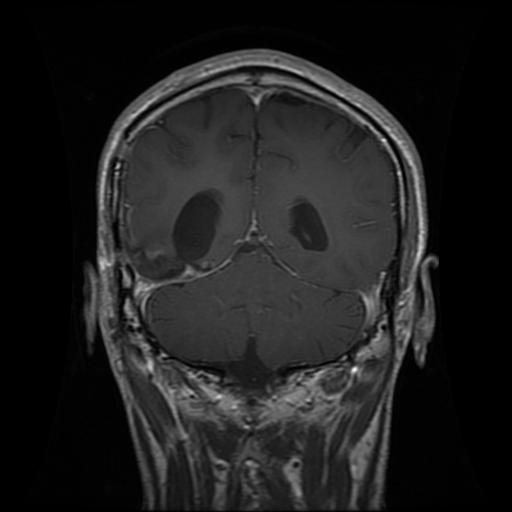

In [24]:
path = 'Dataset/train/mri_glioma'
name = 'glioma (453).jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [25]:
img = load_img(fullname, target_size=(299, 299))

Convert image to Array

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x = np.array(img)
x.shape

(299, 299, 3)

Load model

In [28]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1736050964.108059   12831 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Create a matrix instance (in this test is only 1 entity within the matrix)

In [29]:
X = np.array([x])

In [30]:
X.shape

(1, 299, 299, 3)

we have to adjust the image, in this case the mode is RGB so we dont need to transform its mode

In [31]:
X = preprocess_input(X)

In [32]:
pred = model.predict(X)

I0000 00:00:1736050980.423874   15445 service.cc:148] XLA service 0x7f7b70001bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736050980.424364   15445 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-01-04 22:23:00.469908: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736050980.774910   15445 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


I0000 00:00:1736050986.473709   15445 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [33]:
decode_predictions(pred)

[[('n03124043', 'cowboy_boot', np.float32(0.07181009)),
  ('n03916031', 'perfume', np.float32(0.042393155)),
  ('n04192698', 'shield', np.float32(0.022691077)),
  ('n04487394', 'trombone', np.float32(0.02262745)),
  ('n02823750', 'beer_glass', np.float32(0.020048626))]]

We are getting unaccurate predictions, this is because the model was trained without this kind of images, so we'll proceed with transfer learning. And maybe we could make a test run with a model from scratch.

# Model Training

## Starting Point

I'll use the Xception architecture as the base model, taking advantage of its depthwise separable convolutions to extract detailed and efficient feature representations from the input images. Xception has consistently shown strong performance in image classification tasks and is well-suited for transfer learning due to its generalization capabilities and pretrained weights on the ImageNet dataset. (Also it has the best performance in the keras documentation, and was the one used on lesson 8 :D )

The base model will be adapted for our specific classification task by removing its top layers and adding custom ones. First, I will use a GlobalAveragePooling2D layer to reduce the spatial dimensions of the feature maps and extract a compact representation of the features. Next, I’ll include a Dense layer with 256 units and ReLU activation to allow the model to learn patterns specific to our dataset. Finally, a Dense layer with 7 units and softmax activation will output the probabilities for the 7 classes in our dataset.

In [34]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load Xception base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model for initial training
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/home/maxkaizo/miniconda3/envs/conda_tf_gpu311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-01-04 22:23:40.934141: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3991_0', 112 bytes spill stores, 224 bytes spill loads

2025-01-04 22:23:41.535559: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3991', 220 bytes spill stores, 576 bytes spill loads

2025-01-04 22:23:41.801319: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5871', 68 bytes spill stores, 72 bytes spill loads

2025-01-04 22:23:41.881653: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5871', 24 bytes spill stores, 24 bytes spill loads

2025-01-04 22:23:42.507815: I external/local_xla/xla/s

100/211 ━━━━━━━━━━━━━━━━━━━━ 40s 369ms/step - accuracy: 0.6726 - loss: 0.8735

2025-01-04 22:24:38.025265: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3991_0', 8 bytes spill stores, 8 bytes spill loads

E0000 00:00:1736051083.486846   15443 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736051083.626550   15443 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-01-04 22:24:44.619102: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.96GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-01-04 22:24:45.093972: W external/local_xla/xla/t

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.7318 - loss: 0.7177

2025-01-04 22:25:45.747414: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044_0', 8 bytes spill stores, 8 bytes spill loads

E0000 00:00:1736051148.196669   15440 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736051148.331203   15440 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736051148.476293   15440 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736051148.618523   15440 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please inve

211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 528ms/step - accuracy: 0.7322 - loss: 0.7169 - val_accuracy: 0.8851 - val_loss: 0.3352
Epoch 2/10
 50/211 ━━━━━━━━━━━━━━━━━━━━ 57s 359ms/step - accuracy: 0.8667 - loss: 0.3511

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

At this point we have a nice performance level (over 90% accuracy), so we can make some test, for a single image and for the test dataset

In [ ]:
pred_one = model.predict(X)

In [ ]:
pred_one.round(3)

In [93]:
classes = [
    'ct_healthy',
    'ct_tumor',
    'mri_glioma',
    'mri_healthy',
    'mri_meningioma',
    'mri_pituitary',
    'mri_tumor'
]

In [ ]:
dict(zip(classes, pred_one[0].round(3)))

Theres a huge difference compared to the prediction made before training

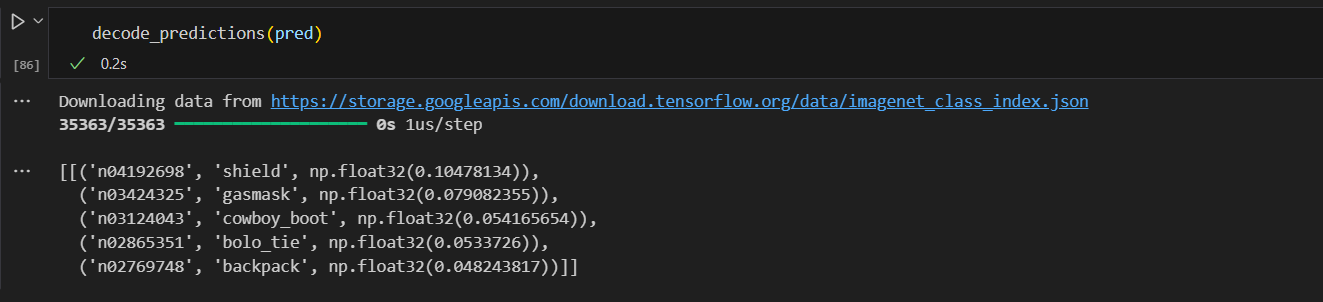

Also, lets try with the test dataset

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


## Hyperparameter tuning 

I'll try some variations of these parameters:

- Learning Rate
- Add an inner layer with different sizes
- Dropout rate

### Learning Rate

In [99]:
from tensorflow import keras

In [100]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator)
    scores[lr] = history.history

    print()
    print()

It seems that we're getting the best performance with a learning rate of 0.001 and the worst is 0.1, so let's discard the latter and graph to see more detail

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

It seems that 0.01 performed well at epoch #5, but its performance degraded over time. On the other hand, 0.0001 looks promising with a steady upward trend, but it's taking too long to converge. I’ve chosen to use 0.001 as it strikes a good balance between learning speed and overall performance.

Best parameters:

- Learning rate = 0.001

### Checkpoint activation

From this point on, I'll activate the checkpoint flag in order to save the best model achieved

In [121]:
model.save_weights('model_v1.weights.h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [124]:
learning_rate = 0.001

In [ ]:
model = make_model(learning_rate=lr)
history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[checkpoint])

### Additional Layer

Adding an inner layer and testing different sizes

In [127]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [128]:
import time

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
%%time
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[checkpoint])
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

The best performance is reached with an aditional layer with size = 100, also the model with this parameter the learning process is more stable and quick.

Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100

### Dropout

#### Desde aqui correr otra vez, por el error en la variable size al correr con varios de dropout


In [179]:
from tensorflow.keras.layers import Dropout

In [180]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [181]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dropout(droprate), 
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
%%time
learning_rate = 0.001
size_inner = 100


scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size_inner,
        droprate=droprate
    )
    history = model.fit(train_generator, epochs=30, validation_data=val_generator,callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

dropouts = [0.0, 0.2, 0.5, 0.8]

fig, axes = plt.subplots(2, 2, figsize=(12, 7))


for ax, droprate in zip(axes.flatten(), dropouts):
    hist = scores[droprate]
    
    ax.plot(hist['accuracy'], label='Train Accuracy')
    ax.plot(hist['val_accuracy'], label='Validation Accuracy')
    
    ax.set_title(f'Dropout Rate: {droprate}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

    ax.set_ylim(0.85, 0.99)
    ax.set_yticks([0.85, 0.875, 0.90, 0.925, 0.95, 0.975])

plt.tight_layout()
plt.show()


In this case, there's no obvious choice, so I'll approach it in two steps:

- Discarding 0.0: A dropout rate of 0.0 is excluded because applying at least some regularization is necessary to mitigate overfitting effects.
- Discarding 0.8: A dropout rate of 0.8 is excluded because it slows down learning and results in more irregular performance.

In the next step, I'll compare the mean and standard deviation of the validation accuracy for the remaining options.

In [ ]:
import pandas as pd

dropouts = [0.2, 0.5]
stats = {}

for droprate in dropouts:
    hist = scores[droprate]
    
    data = pd.DataFrame({
        'Train Accuracy': hist['accuracy'],
        'Validation Accuracy': hist['val_accuracy']
    })
    
    stats[droprate] = data.describe()

for droprate, stat in stats.items():
    print(f"Dropout Rate: {droprate}")
    print(stat)
    print("\n")


I'm choosing Dropout Rate of 0.5 as it shows a higher mean, a lower standar deviation and a higher maximum

Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100
- Dropout Rate = 0.50

### Data Augmentation

Now I'll try some data augmentation. I just have to take into account that there are some images in the dataset that had already been augmented.

In [174]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
def load_images(parameter):
    datagen = ImageDataGenerator(**parameter)
    train_generator = datagen.flow_from_directory(
        'Dataset/train/',
        target_size=(299, 299),  # Expected size for Xception
        batch_size=32,
        class_mode='categorical',
    )
    return train_generator

In [176]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dropout(droprate), 
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
%%time
learning_rate = 0.001
size_inner = 100
droprate=0.5

scores = {}

parameters = [
    {"rotation_range": 20},
    {"width_shift_range": 0.2},
    {"height_shift_range": 0.2},
    {"shear_range": 0.2},
    {"zoom_range": 0.2},
    {"horizontal_flip": True}
]


for p_ in parameters:
    print(p_)

    train_generator = load_images(p_)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    history = model.fit(train_generator, epochs=30, validation_data=val_generator,callbacks=[checkpoint])
    scores[p_] = history.history

    print()
    print()